In [ ]:
#Step1: Download the data from this link: https://datahack.analyticsvidhya.com/contest/lead-conversion/
#Step2: Put code this code file and data insight the same folder
#Step3: You should have installed Python 2.7 for running this code 
#Step4: You should have all libraries installed, which I have imported in next cell 

In [403]:

import pandas as pd
import numpy as np
import sklearn 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

p = sns.color_palette()




Digital arms of banks today face challenges with lead conversion, they source leads
through mediums like search, display, email campaigns and via affiliate partners.
Here Happy Customer Bank faces same challenge of low conversion ratio. They have
given a problem to identify the customers segments having higher conversion ratio
for a specific loan product so that they can specifically target these customers, here
they have provided a partial data set for salaried customers only from the last 3
months. They also capture basic details about customers like gender, DOB, existing
EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction
data and many others. Let’s look at the process at Happy Customer Bank.


In [404]:
# Hypothesis 1: Higher salary person will not be intrested in getting loan
# Hypothesis 2: If applied loan amount is high then chances of getting this loan is very rare
# Hypothesis 3: Metro cities people may want more frequent loan as compare to other area
# Hypothesis 4: If a person already has taken the loan they won't take more loan
# Hypothesis 5: If interest rate is high people will not be intrested
# Hypothesis 6: If there are many steps in the process distributing loan people won't be intrested 

In [405]:
# read the data 
train  = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [406]:
# columns in train
train.columns

Index([u'ID', u'Gender', u'City', u'Monthly_Income', u'DOB',
       u'Lead_Creation_Date', u'Loan_Amount_Applied', u'Loan_Tenure_Applied',
       u'Existing_EMI', u'Employer_Name', u'Salary_Account',
       u'Mobile_Verified', u'Var5', u'Var1', u'Loan_Amount_Submitted',
       u'Loan_Tenure_Submitted', u'Interest_Rate', u'Processing_Fee',
       u'EMI_Loan_Submitted', u'Filled_Form', u'Device_Type', u'Var2',
       u'Source', u'Var4', u'LoggedIn', u'Disbursed'],
      dtype='object')

In [407]:
# columns in test
test.columns

Index([u'ID', u'Gender', u'City', u'Monthly_Income', u'DOB',
       u'Lead_Creation_Date', u'Loan_Amount_Applied', u'Loan_Tenure_Applied',
       u'Existing_EMI', u'Employer_Name', u'Salary_Account',
       u'Mobile_Verified', u'Var5', u'Var1', u'Loan_Amount_Submitted',
       u'Loan_Tenure_Submitted', u'Interest_Rate', u'Processing_Fee',
       u'EMI_Loan_Submitted', u'Filled_Form', u'Device_Type', u'Var2',
       u'Source', u'Var4'],
      dtype='object')

In [408]:
#see the columns are present in test and not in train
[i for i in train.columns if i not in test.columns]

['LoggedIn', 'Disbursed']

In [409]:
# first 5 observations in train 
train.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [410]:
# to see the shape of dataframe( number of rows, columns)
train.shape,test.shape

((87020, 26), (37717, 24))

In [411]:
# See the data type of all features
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [412]:
# For summary of numerical variables in train
train.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,LoggedIn,Disbursed
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,87020.000000,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,87020.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,4.961503,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,2.949805,0.029350,0.014629
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,5.670385,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,1.697720,0.168785,0.120062
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,0.000000,0.000000
25%,1.650000e+04,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
50%,2.500000e+04,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000
75%,4.000000e+04,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,18.000000,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,7.000000,1.000000,1.000000


In [413]:
# Number of null values
train.isnull().sum()

ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                     0
Disbursed                    0
dtype: int64

In [414]:
# Understanding the categorical variables
cat_columns = []
num_col = []
for i in train.columns:
    if train[i].dtype == 'O':
        cat_columns.append(i)
        print '\nfeature_name-',i,':','total_category-' ,len(np.unique(train[i])),#'\n\ncatgory_name-', np.unique(train[i]),'\n'
    else:
        num_col.append(i)


feature_name- ID : total_category- 87020 
feature_name- Gender : total_category- 2 
feature_name- City : total_category- 698 
feature_name- DOB : total_category- 11345 
feature_name- Lead_Creation_Date : total_category- 92 
feature_name- Employer_Name : total_category- 43568 
feature_name- Salary_Account : total_category- 58 
feature_name- Mobile_Verified : total_category- 2 
feature_name- Var1 : total_category- 19 
feature_name- Filled_Form : total_category- 2 
feature_name- Device_Type : total_category- 2 
feature_name- Var2 : total_category- 7 
feature_name- Source : total_category- 30


0.01462882096069869

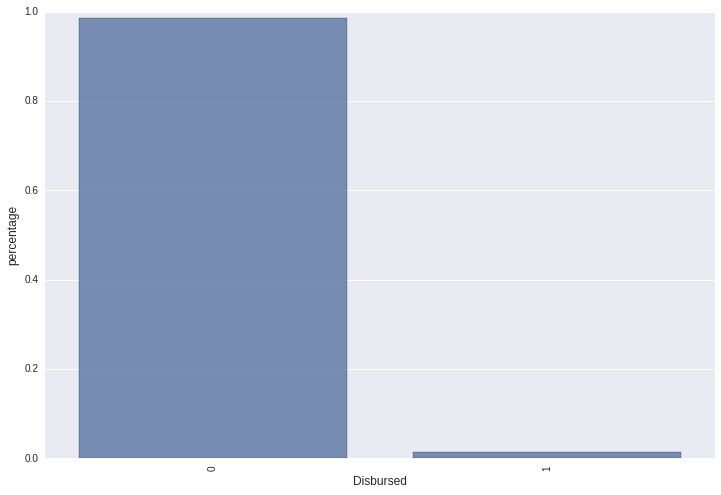

In [415]:
#percentage Disbursed in train
t1 = train['Disbursed'].value_counts() * 1.0 / train.shape[0]


plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0])
plt.legend()
plt.xlabel('Disbursed', fontsize=12)
plt.ylabel('percentage', fontsize=12)
plt.xticks(rotation = 90)


# percentage of postive class
np.sum(train.Disbursed) * 1.0/train.shape[0]
# only 1.4 %  class fall under imbalanced class


(array([      0.,   50000.,  100000.,  150000.,  200000.]),
 <a list of 5 Text xticklabel objects>)

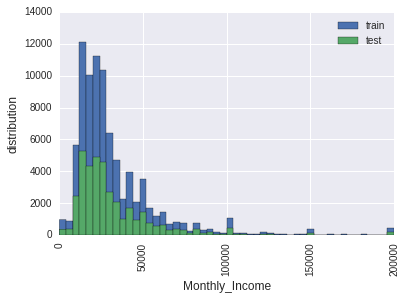

In [416]:
#Distibution of Monthly_Income in train  from 0 to 200000

%matplotlib inline
train['Monthly_Income'].hist(bins=50,range= (0,200000),label = 'train')
test['Monthly_Income'].hist(bins=50,range= (0,200000),label = 'test')
plt.legend()
plt.xlabel('Monthly_Income', fontsize=12)
plt.ylabel('distribution', fontsize=12)
plt.xticks(rotation = 90)

(array([      0.,   50000.,  100000.,  150000.,  200000.]),
 <a list of 5 Text xticklabel objects>)

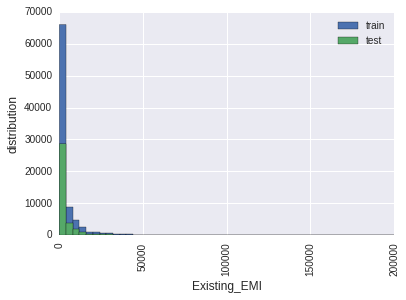

In [417]:
#Distibution of Existing_EMI   from 0 to 200000
%matplotlib inline
train['Existing_EMI'].hist(bins=50,range= (0,200000),label = 'train')
test['Existing_EMI'].hist(bins=50,range= (0,200000),label = 'test')
plt.legend()
plt.xlabel('Existing_EMI', fontsize=12)
plt.ylabel('distribution', fontsize=12)
plt.xticks(rotation = 90)

(array([       0.,   500000.,  1000000.,  1500000.,  2000000.,  2500000.,
         3000000.]), <a list of 7 Text xticklabel objects>)

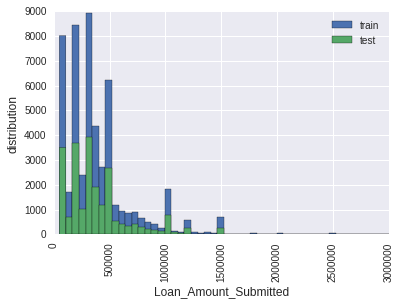

In [418]:
#Distibution of Loan_Amount_Submitted  
%matplotlib inline
train['Loan_Amount_Submitted'].hist(bins=50,label = 'train')
test['Loan_Amount_Submitted'].hist(bins=50,label = 'test')
plt.legend()
plt.xlabel('Loan_Amount_Submitted', fontsize=12)
plt.ylabel('distribution', fontsize=12)
plt.xticks(rotation = 90)

(array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 7 Text xticklabel objects>)

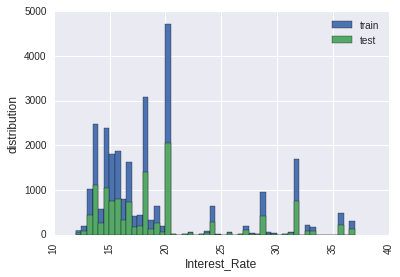

In [419]:
#Distibution of Interest_Rate in train 
train['Interest_Rate'].hist(bins=50,label = 'train')
test['Interest_Rate'].hist(bins=50,label = 'test')
plt.legend()
plt.xlabel('Interest_Rate', fontsize=12)
plt.ylabel('distribution', fontsize=12)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

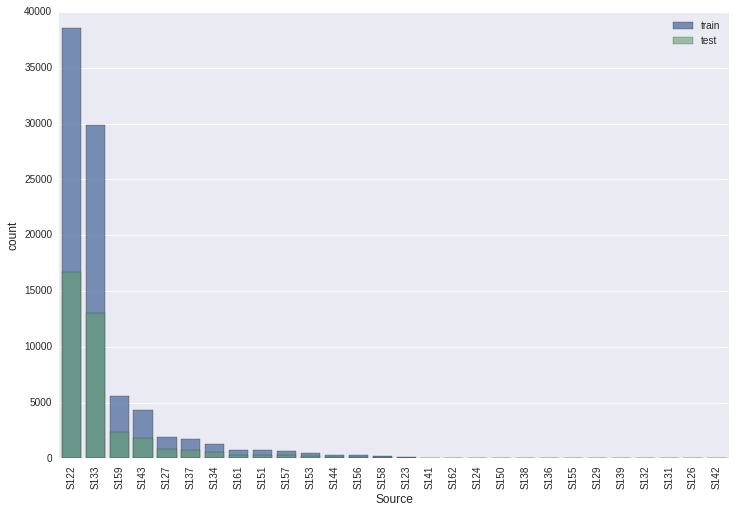

In [420]:
# source counts in train and test

t1 = train['Source'].value_counts()
t2 = test['Source'].value_counts()

plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0], label='train')
t2 = sns.barplot(t2.index, t2.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Source', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

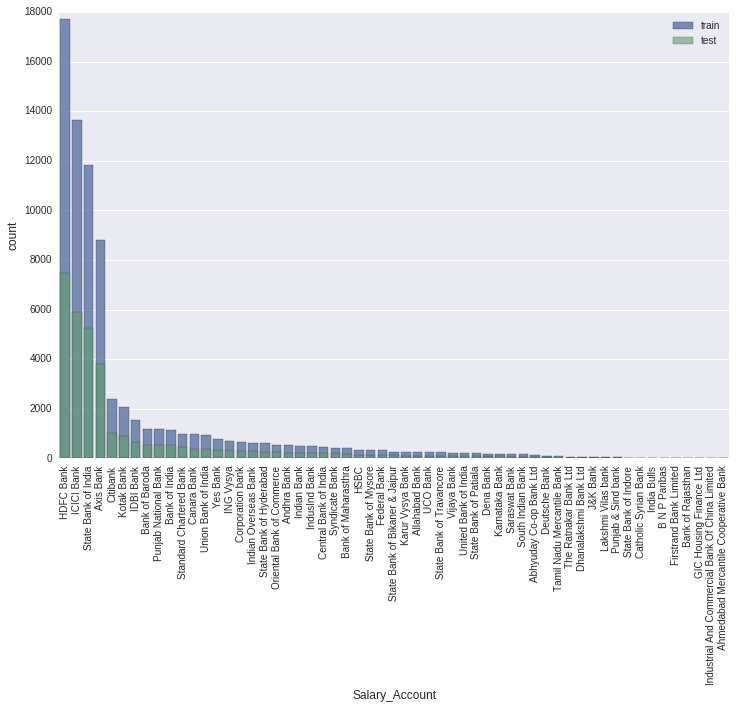

In [421]:
# count of Salary_Account
t1 = train['Salary_Account'].value_counts()
t2 = test['Salary_Account'].value_counts()

plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0], label='train')
t2 = sns.barplot(t2.index, t2.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Salary_Account', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

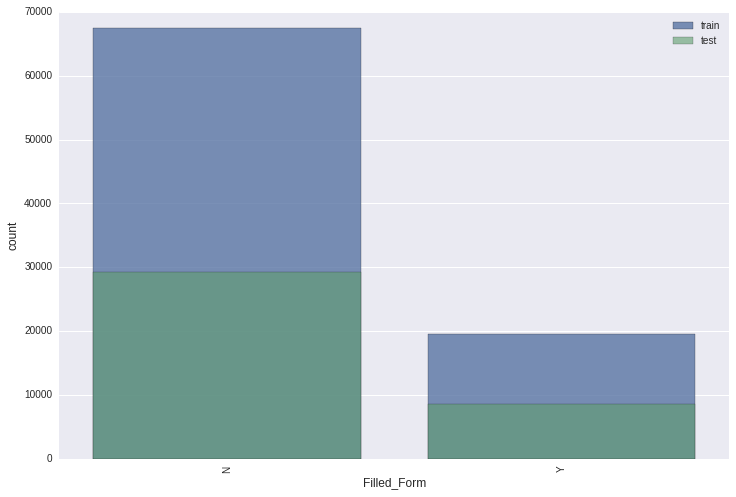

In [422]:
# Filled_Form count
t1 = train['Filled_Form'].value_counts()
t2 = test['Filled_Form'].value_counts()

plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0], label='train')
t2 = sns.barplot(t2.index, t2.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Filled_Form', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation = 90)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

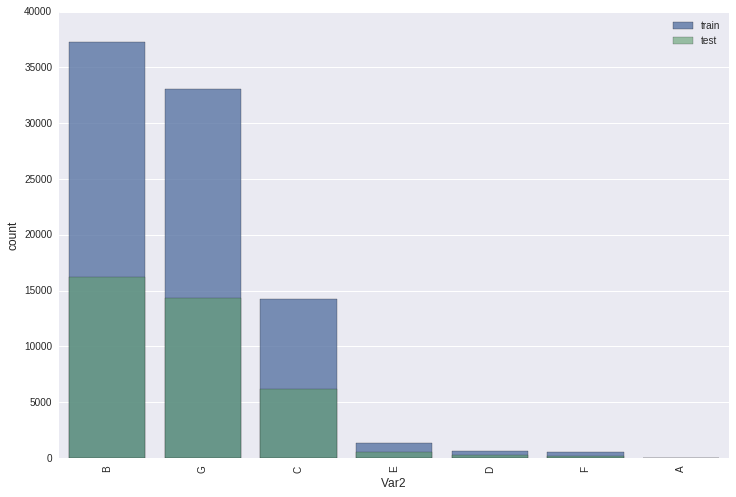

In [423]:
# Var2 count
t1 = train['Var2'].value_counts()
t2 = test['Var2'].value_counts()

plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0], label='train')
t2 = sns.barplot(t2.index, t2.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Var2', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

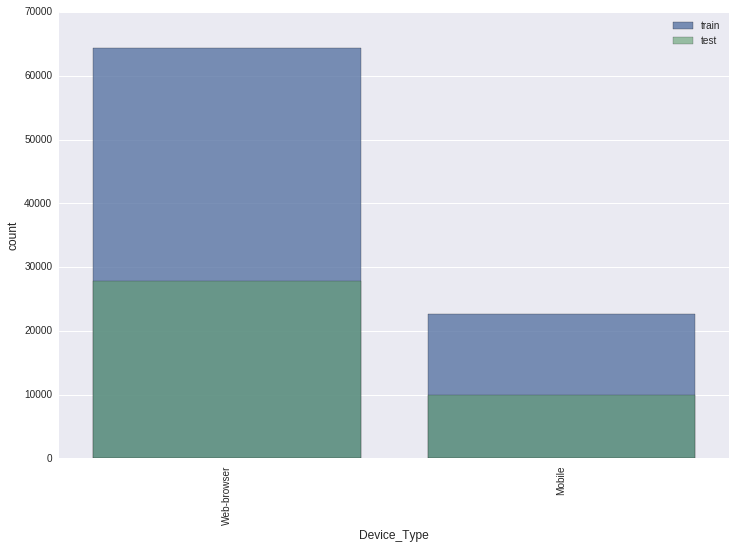

In [424]:
# Device_Type form count
t1 = train['Device_Type'].value_counts()
t2 = test['Device_Type'].value_counts()

plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0], label='train')
t2 = sns.barplot(t2.index, t2.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('Device_Type', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

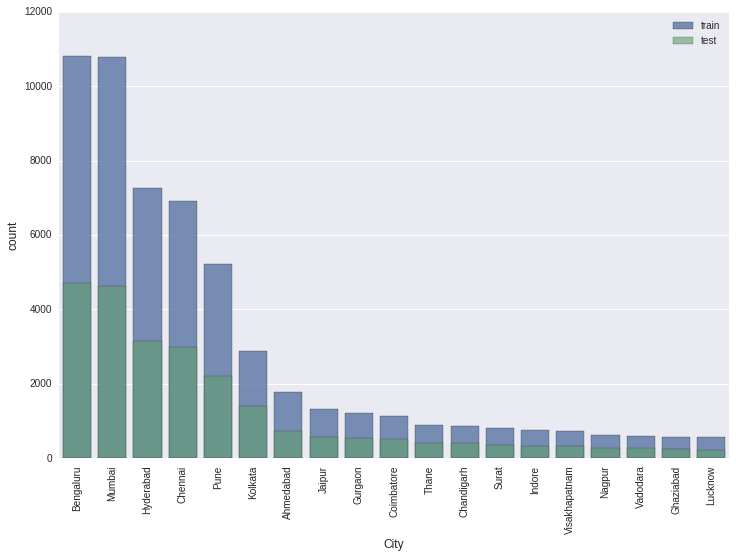

In [425]:
# top 20 cities  
t1 = train['City'].value_counts()[1:20]
t2 = test['City'].value_counts()[1:20]

plt.figure(figsize=(12,8))
t1 = sns.barplot(t1.index, t1.values, alpha=0.8, color=p[0], label='train')
t2 = sns.barplot(t2.index, t2.values, alpha=0.6, color=p[1], label='test')
plt.legend()
plt.xlabel('City', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation = 90)


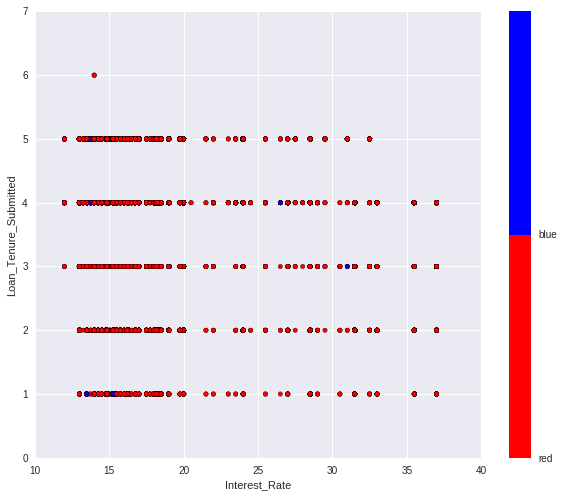

In [426]:

# scatter plot between Interest_Rate and Loan_Tenure_Submitted in train
x = train.Interest_Rate
y = train.Loan_Tenure_Submitted
colors = ['red','blue']
label = train.Disbursed
fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, c= label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)
plt.xlabel('Interest_Rate')
plt.ylabel('Loan_Tenure_Submitted')

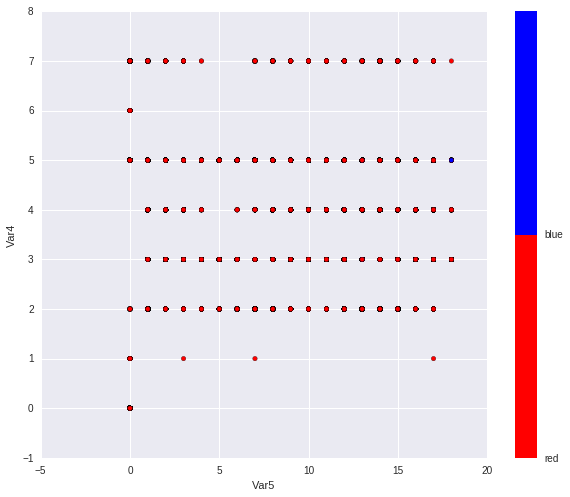

In [427]:

# scatter plot between Var5 and Var4 in train
x = train.Var5
y = train.Var4
colors = ['red','blue']
label = train.Disbursed
fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, c= label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)
plt.xlabel('Var5')
plt.ylabel('Var4')


Number of observation
Filled_Form      N      Y
Disbursed                
0            66704  19043
1              826    447

Proportinate of outcome yes
Filled_Form         N         Y
Disbursed                      
0            0.987768  0.977065
1            0.012232  0.022935



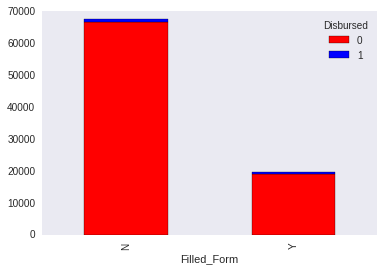

In [428]:
# Understand the relationship b/w Filled_Form type and Disbursed
temp3 = pd.crosstab(train['Filled_Form'], train['Disbursed'])
temp1 = train.groupby(['Filled_Form']).count()['ID']
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

print "\nNumber of observation"
print temp3.transpose()

print "\nProportinate of outcome yes"
print temp3.transpose()/temp1.values
print 

 




Number of observation
Interest_Rate    -1    11   12    13    14    15    16   17    18   19 ...   \
Disbursed                                                              ...    
0              58612   85  176  3343  2790  3551  2382  834  3375  820 ...    
1                682    5   15   154   156   125    45   12    32    9 ...    

Interest_Rate   26   27   28   29   30    31   32   33   35   37  
Disbursed                                                         
0               15  221  951   72   13  1749  212  156  492  302  
1                1    2    5    0    0     3    0    2    1    0  

[2 rows x 26 columns]

Proportinate of outcome yes
Interest_Rate       -1         11        12        13        14        15  \
Disbursed                                                                   
0              0.988498  0.944444  0.921466  0.955962  0.947047  0.965996   
1              0.011502  0.055556  0.078534  0.044038  0.052953  0.034004   

Interest_Rate        16        

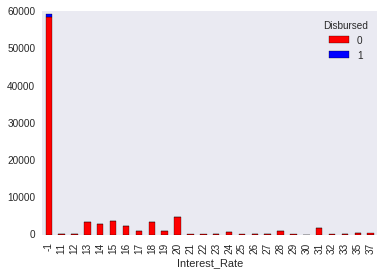

In [429]:
# Understand the relationship b/w Interest_Rate and Outcome (-1 shows the null)
Interest_Rate  = train[['Interest_Rate','Disbursed']].replace(np.nan , -1)
Interest_Rate['Interest_Rate'] = Interest_Rate.Interest_Rate.astype(int)
temp3 = pd.crosstab(Interest_Rate['Interest_Rate'], Interest_Rate['Disbursed'])
temp1 = Interest_Rate.groupby(['Interest_Rate']).count()['Disbursed']
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

print "\nNumber of observation"
print temp3.transpose()

print "\nProportinate of outcome yes"
print temp3.transpose()/temp1.values
print 




Number of observation
Var2       A      B      C    D     E    F      G
Disbursed                                        
0          5  36652  14034  634  1294  538  32590
1          0    628    176    0    21    6    442

Proportinate of outcome yes
Var2         A         B         C    D        E         F         G
Disbursed                                                           
0          1.0  0.983155  0.987614  1.0  0.98403  0.988971  0.986619
1          0.0  0.016845  0.012386  0.0  0.01597  0.011029  0.013381



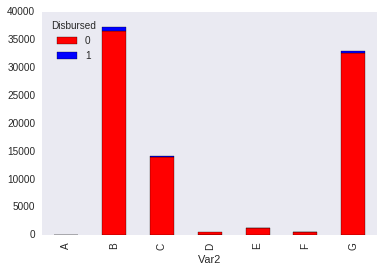

In [430]:
# Understand the relationship b/w Var2 type and Disbursed
temp3 = pd.crosstab(train['Var2'], train['Disbursed'])
temp1 = train.groupby(['Var2']).count()['ID']
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

print "\nNumber of observation"
print temp3.transpose()

print "\nProportinate of outcome yes"
print temp3.transpose()/temp1.values
print 

 




Number of observation
Device_Type  Mobile  Web-browser
Disbursed                       
0             22440        63307
1               264         1009

Proportinate of Disbursed yes
Device_Type    Mobile  Web-browser
Disbursed                         
0            0.988372     0.984312
1            0.011628     0.015688



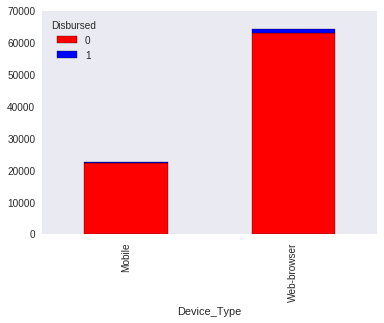

In [431]:
# Understand the relationship b/w Device_Type type and Disbursed
temp3 = pd.crosstab(train['Device_Type'], train['Disbursed'])
temp1 = train.groupby(['Device_Type']).count()['ID']
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

print "\nNumber of observation"
print temp3.transpose()

print "\nProportinate of Disbursed yes"
print temp3.transpose()/temp1.values
print 


In [432]:
#First Drop the LoggedIn ,ID, Disbursed from the train and ID from the test

In [433]:
# convert DOB in datetime format
train['DOB'] =  pd.to_datetime(train['DOB'], format = '%d-%b-%y')
test['DOB'] =  pd.to_datetime(test['DOB'], format = '%d-%b-%y')

In [434]:
# get the age of a persons on date '2017-01-01'
train_days = (pd.to_datetime('2017-01-01') - train['DOB'])
train_days = train_days.apply(lambda x:x.days )
train_days = train_days* 1.0/ 365.0 
train['Age'] = train_days

# get the age of a persons on date '2017-01-01'
test_days = (pd.to_datetime('2017-01-01') - test['DOB'])
test_days = test_days.apply(lambda x:x.days )
test_days = test_days* 1.0/ 365.0 
test['Age'] = test_days


Number of observation
Age_Bucket   -5    -4   -3  -2  -1   0    1      2      3     4
Disbursed                                                      
0           890  2556  320  15   3  17  118  37708  37329  6791
1            22    44    1   0   0   0    0    320    741   145

Proportinate of outcome yes
Age_Bucket        -5        -4        -3   -2   -1    0    1         2  \
Disbursed                                                                
0           0.975877  0.983077  0.996885  1.0  1.0  1.0  1.0  0.991585   
1           0.024123  0.016923  0.003115  0.0  0.0  0.0  0.0  0.008415   

Age_Bucket         3         4  
Disbursed                       
0           0.980536  0.979095  
1           0.019464  0.020905  



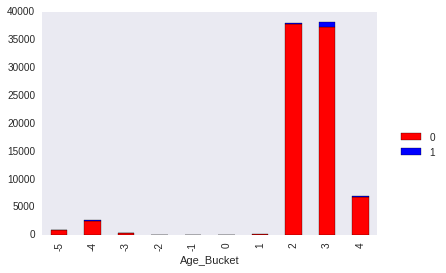

In [435]:
# Understand the relationship b/w Age and Outcome
#First Conver the Age to age Bucket
train['Age_Bucket']=train['Age']/10
train['Age_Bucket']=train['Age_Bucket'].astype(int)
test['Age_Bucket']=train['Age']/10
test['Age_Bucket']=train['Age_Bucket'].astype(int)

temp3 = pd.crosstab(train['Age_Bucket'], train['Disbursed'])
temp1 = train.groupby(['Age_Bucket']).count()['ID']
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False).legend(bbox_to_anchor = (1.2,0.5))
print "\nNumber of observation"
print temp3.transpose()

print "\nProportinate of outcome yes"
print temp3.transpose()/temp1.values
print 



In [436]:
# get the month and year from lead creation 
train['Lead_Creation_Date'] =  pd.to_datetime(train['Lead_Creation_Date'], format = '%d-%b-%y')
test['Lead_Creation_Date'] =  pd.to_datetime(test['Lead_Creation_Date'], format = '%d-%b-%y')
train['month'] = train.Lead_Creation_Date.dt.month
train['year'] = train.Lead_Creation_Date.dt.year
test['month'] = test.Lead_Creation_Date.dt.month
test['year'] = test.Lead_Creation_Date.dt.year

# Model building 

In [437]:
#First Drop the  Disbursed, LoggedIn, Lead_Creation_Date, ID, DOB from the train and Lead_Creation_Date, ID, DOB from the test

In [438]:
Outcome = train.Disbursed
test_ID = test.ID
train  = train.drop(['Disbursed', 'LoggedIn', 'Lead_Creation_Date', 'ID', 'DOB'],axis =1 )
test  = test.drop([ 'Lead_Creation_Date', 'ID', 'DOB'],axis =1 )

In [439]:
# fille the null values with -1
train.replace(np.nan , -1,inplace  =True)
test.replace(np.nan , -1,inplace  =True)

In [440]:
# We have to convert all categorical variables into numerical
from sklearn import preprocessing
for f in train.columns:
    if train[f].dtype=='object':    
        print 'Label Encoding for feature:',f
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values)) 

Label Encoding for feature: Gender
Label Encoding for feature: City
Label Encoding for feature: Employer_Name
Label Encoding for feature: Salary_Account
Label Encoding for feature: Mobile_Verified
Label Encoding for feature: Var1
Label Encoding for feature: Filled_Form
Label Encoding for feature: Device_Type
Label Encoding for feature: Var2
Label Encoding for feature: Source


In [441]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Create the object of models
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [442]:
# Apply LogisticRegression
model_LR = LR.fit(train,Outcome)
prediction_LR = model_LR.predict(test)
sub_LR = pd.DataFrame({'ID':test_ID,'Disbursed':prediction_LR})
sub_LR.to_csv('SUB_LR.csv',index = False)



In [443]:
#Apply DecisionTreeClassifier
model_DT = DT.fit(train,Outcome)
predictions_DT = model_DT.predict(test)
sub_DT = pd.DataFrame({'ID':test_ID,'Disbursed':predictions_DT})
sub_DT.to_csv('SUB_DT.csv',index = False)

In [444]:
# Apply RandomForestClassifier
#RandomForestClassifier Accuracy  0.891437433679
model_RF = RF.fit(train,Outcome)
predictions_RF = model_RF.predict(test)
sub_RF = pd.DataFrame({'ID':test_ID,'Disbursed':predictions_RF})
sub_RF.to_csv('SUB_RF.csv',index = False)

In [445]:
# feature importance
importances = model_RF.feature_importances_
important=pd.Series(importances,index= train.columns)
important.sort_values(axis=0, ascending=True)

year                     0.000000
Mobile_Verified          0.002077
Device_Type              0.002243
Filled_Form              0.005025
Gender                   0.008594
Var2                     0.014868
Var4                     0.015727
Var1                     0.018973
Age_Bucket               0.022684
Loan_Tenure_Submitted    0.023101
Interest_Rate            0.023235
month                    0.023799
Loan_Tenure_Applied      0.028875
Processing_Fee           0.033793
Source                   0.034199
Loan_Amount_Applied      0.037557
EMI_Loan_Submitted       0.039699
Loan_Amount_Submitted    0.046763
Var5                     0.055762
Salary_Account           0.061127
Existing_EMI             0.063001
City                     0.073358
Monthly_Income           0.105418
Age                      0.129888
Employer_Name            0.130232
dtype: float64